## Instalacion Librerias

In [ ]:
pip install requests

In [ ]:
pip install beautifulsoup4

In [ ]:
pip install pandas 

In [ ]:
pip install logging

In [ ]:
pip install selenium

In [ ]:
pip install matplotlib

## Importar Librerias

In [1]:
import requests
import logging
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException

## Objetivo

El objetivo del proyecto consiste en verificar la información contenida en esta página web, identificando qué datos se pueden extraer. Además, buscamos determinar la frecuencia con la que esta información se actualiza, identificar los cambios específicos que se producen y mantenernos informados sobre las últimas noticias relacionadas.

<div align="center">
    <img src="images/01.PNG" width="800" height="600">
</div>

Este script realiza una solicitud GET a la página web especificada para obtener su contenido HTML. Utilizando la biblioteca BeautifulSoup para parsear dicho contenido, el objetivo es identificar la estructura del HTML de la página. Este proceso permite una inspección inicial del código fuente, facilitando la identificación de los elementos específicos de la página que podrían ser de interés para extracciones de datos posteriores. El script verifica primero la respuesta del servidor para asegurar que la solicitud fue exitosa antes de proceder con el análisis del HTML.

In [ ]:
# Configurar el nivel de log
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# URL de la página web
url = "https://www.constructorabolivar.com/proyectos-vivienda"

try:
    # Realizar la solicitud GET
    respuesta = requests.get(url, timeout=5)  # Esperar 5 segundos como máximo

    # Verificar el estado de la solicitud
    if respuesta.status_code == 200:
        # Parsear el contenido HTML
        soup = BeautifulSoup(respuesta.text, 'html.parser')
        
        # Mostrar una muestra del HTML
        html_sample = soup.prettify()[:1000]  # Limitado a los primeros 1000 caracteres
        logging.info("Muestra del HTML:\n" + html_sample)
        
    else:
        logging.error(f"Error en la solicitud: Estado {respuesta.status_code}")
except requests.RequestException as e:
    logging.error(f"Error al realizar la solicitud: {e}")


<div align="center">
    <img src="images/02.PNG" width="800" height="600">
</div>

Buscamos dentro de la página elementos "strong" que estén anidados directamente bajo elementos "h3", los cuales a su vez se encuentran dentro de "div" con la clase card-item-title. Al iterar sobre estos elementos y imprimir el texto que contienen, el script busca evidencia de contenido dinámico. La presencia de placeholders como ${item.title} en la respuesta impresa sugiere que la página podría estar cargando contenido dinámicamente mediante JavaScript, ya que estos placeholders suelen reemplazarse con datos reales en tiempo de ejecución por scripts del lado del cliente.

In [ ]:
# URL de la página web
url = "https://www.constructorabolivar.com/proyectos-vivienda"

# Realizar la solicitud GET
respuesta = requests.get(url)

# Verificar el estado de la solicitud
if respuesta.status_code == 200:
    # Parsear el contenido HTML
    soup = BeautifulSoup(respuesta.text, 'html.parser')
    # Buscar todos los elementos 'strong' directamente dentro de 'h3' dentro de los contenedores 'div' con clase 'card-item-title'
    titulos = soup.select('div.card-item-title h6 strong')
    # Iterar sobre cada título y imprimir el texto
    for titulo in titulos:
        print(titulo.text.strip())
else:
    print("Error en la solicitud: Estado", respuesta.status_code)

De igual manera, podemos asignarle un nombre al campo que recupera, sin embargo, de esta manera no podriamos obtener el nombre real.

In [ ]:

# URL de la página web
url = "https://www.constructorabolivar.com/proyectos-vivienda"

# Realizar la solicitud GET
respuesta = requests.get(url)

# Verificar el estado de la solicitud
if respuesta.status_code == 200:
    # Parsear el contenido HTML
    soup = BeautifulSoup(respuesta.text, 'html.parser')
    # Buscar todos los elementos 'strong' directamente dentro de 'h3' dentro de los contenedores 'div' con clase 'card-item-title'
    titulos = soup.select('div.card-item-title h3 strong')
    # Iterar sobre cada título y imprimir el texto
    for titulo in titulos:
        # Aquí se imprime la cadena literal "${item.title}"
        print(titulo.text.strip())
        # Aquí se reemplaza la cadena literal "${item.title}" por "Proyecto XYZ"
        texto_reemplazado = titulo.text.strip().replace("${item.title}", "Proyecto XYZ")
        print(texto_reemplazado)
else:
    print("Error en la solicitud: Estado", respuesta.status_code)

Al enfrentarnos a la limitación de no poder recuperar información de manera eficaz mediante métodos tradicionales de scraping HTML, debido a la naturaleza dinámica de la página objetivo, optamos por acceder directamente a una API proporcionada por el sitio web. Este enfoque nos permite obtener la información de manera estructurada y completa durante el proceso de carga de la página, aprovechando el formato JSON para facilitar el análisis y extracción de datos relevantes.

El código realiza una solicitud GET a la URL específica de la API, que devuelve los datos de los proyectos en formato JSON. Tras verificar una respuesta exitosa del servidor (código de estado 200), el script parsea esta respuesta JSON para iterar sobre cada objeto de proyecto individualmente. Durante esta iteración, extrae y muestra datos clave de cada proyecto, incluyendo identificadores únicos, títulos, ciudades, precios, estados, y más, así como URLs para logos e imágenes destacadas. Además, proporciona información sobre el tipo de vivienda y la disponibilidad de subsidios, culminando con la URL para una vista detallada de cada proyecto.

Este método nos permite obtener una visión detallada y actualizada de los proyectos disponibles, superando los desafíos que presenta el scraping de sitios web dinámicos y aprovechando la eficiencia y estructura que ofrecen las APIs para la recuperación de datos.

La informacion de la API se obtiene de la siguiente manera, si no aparece, recargar la pagina

<div align="center">
    <img src="images/03.PNG" width="800" height="600">
</div>

Informacion del JSON correspondiente al xhr de la API

<div align="center">
    <img src="images/04.PNG" width="800" height="600">
</div>

In [ ]:
# URL de la API
url = "https://www.constructorabolivar.com/api/proyectos2/all/all/all?_format=json"

# Realizar la solicitud GET
respuesta = requests.get(url)

# Verificar si la solicitud fue exitosa
if respuesta.status_code == 200:
    # Parsear la respuesta JSON
    proyectos = respuesta.json()
    # Iterar sobre cada proyecto e imprimir algunos campos
    for proyecto in proyectos:
        print(f"ID: {proyecto['nid']}")
        print(f"Título: {proyecto['title']}")
        print(f"Departamento: {proyecto['field_departamento']}")
        print(f"Ciudad: {proyecto['field_ciudad']}")
        print(f"Precio: {proyecto['field_precio']}")
        print(f"Precio SMMLV: {proyecto['field_precio_smmlv']}")
        print(f"Sector: {proyecto['field_sector']}")
        print(f"Barrio: {proyecto['field_barrio']}")
        print(f"Estado: {proyecto['field_estados']}")
        print(f"Area Minima: {proyecto['field_area_minima']}")
        print(f"Area Privada Minima: {proyecto['field_area_privada_minima']}")
        print(f"Alcobas: {proyecto['field_alcobas']}")
        print(f"Logo URL: {proyecto['field_logo']}")
        print(f"Imagen Destacada URL: {proyecto['field_imagen_destacada']}")
        print(f"Tipo de Vivienda: {proyecto['field_tipo_de_vivienda']}")
        print(f"URL de Vista: {proyecto['view_node']}")
        print(f"Descripciones Destacadas: {proyecto.get('field_descripcion_destacada_1', '')}, {proyecto.get('field_descripcion_destacada_2', '')}, {proyecto.get('field_descripcion_destacada_3', '')}, {proyecto.get('field_descripcion_destacada_4', '')}")
        print("------------------------------------------------")
else:
    print("Error en la solicitud: Estado", respuesta.status_code)


Para obtener una visión completa de los proyectos, es esencial acceder a los detalles específicos contenidos dentro de cada página de proyecto. Aunque ya hemos recopilado la información principal de los proyectos, nos falta explorar la información detallada que se encuentra al interior de cada uno de ellos.

Por esta razón, hemos ajustado nuestro código para que ahora incluya la capacidad de extraer la URL de cada proyecto. Este paso nos permite adentrarnos en cada página individual de proyecto, donde podremos recabar datos más específicos y enriquecer nuestro conjunto de información con detalles más profundos sobre cada proyecto.

<div align="center">
    <img src="images/05.PNG" width="800" height="600">
</div>

In [ ]:
# URL base del sitio web
url_base = "https://www.constructorabolivar.com"

# URL de la API
url_api = "https://www.constructorabolivar.com/api/proyectos2/all/all/all?_format=json"

# Realizar la solicitud GET a la API
respuesta = requests.get(url_api)

# Función para obtener la información detallada de un proyecto
def obtener_info_proyecto(url_proyecto):
    respuesta = requests.get(url_proyecto)
    if respuesta.status_code == 200:
        soup = BeautifulSoup(respuesta.text, 'html.parser')
        # Ajusta el selector para obtener la descripción
        elemento_descripcion = soup.find('div', class_='descripcion-clase')  # Cambiar por el selector correcto
        if elemento_descripcion:  # Verificar si se encontró el elemento
            descripcion = elemento_descripcion.text.strip()
        else:
            descripcion = "Descripción no encontrada"
        return descripcion
    else:
        return "No se pudo obtener la información"

if respuesta.status_code == 200:
    proyectos = respuesta.json()
    for proyecto in proyectos:
        # URL completa del proyecto
        url_proyecto_completa = url_base + proyecto['view_node']
        print(f"URL del Proyecto: {url_proyecto_completa}")

        # Obtener información detallada de cada proyecto
        info_adicional = obtener_info_proyecto(url_proyecto_completa)
        print(f"Información adicional: {info_adicional}")
        print("------------------------------------------------")
else:
    print("Error en la solicitud: Estado", respuesta.status_code)

Hemos integrado ambos procedimientos con el objetivo de capturar no solo los datos generales de los proyectos, sino también los detalles específicos accesibles a través de sus respectivas páginas web. Este enfoque nos permite extraer la URL

In [ ]:
# URL base del sitio web para completar las URLs relativas
url_base = "https://www.constructorabolivar.com"

# Función para obtener información detallada de cada proyecto
def obtener_info_proyecto(url_proyecto):
    respuesta = requests.get(url_proyecto)
    if respuesta.status_code == 200:
        soup = BeautifulSoup(respuesta.text, 'html.parser')
        # Aquí puedes ajustar los selectores según la estructura específica de la página de cada proyecto
        # y la información adicional que deseas obtener. Este es un ejemplo para obtener una descripción:
        elemento_descripcion = soup.find('div', class_='alguna-clase-para-la-descripcion')  # Ajusta este selector
        descripcion = elemento_descripcion.text.strip() if elemento_descripcion else "Descripción no encontrada"
        return descripcion
    else:
        return "No se pudo obtener la información del proyecto"

# URL de la API
url_api = "https://www.constructorabolivar.com/api/proyectos2/all/all/all?_format=json"

# Realizar la solicitud GET a la API
respuesta = requests.get(url_api)

if respuesta.status_code == 200:
    proyectos = respuesta.json()
    for proyecto in proyectos:
        # Imprimir información básica obtenida de la API
        print(f"ID: {proyecto['nid']}")
        print(f"Título: {proyecto['title']}")

        # Completar la URL relativa del proyecto
        url_proyecto = url_base + proyecto['view_node']
        print(f"URL del Proyecto: {url_proyecto}")
        info_adicional = obtener_info_proyecto(url_proyecto)
        print(f"Información adicional: {info_adicional}")
        print("------------------------------------------------")
else:
    print("Error en la solicitud: Estado", respuesta.status_code)

En este código, se realiza una integración avanzada de solicitudes HTTP y análisis HTML para extraer y compilar una amplia gama de información sobre proyectos de construcción disponibles a través de la API pública y las páginas web individuales de cada proyecto. La estrategia implementada consiste en dos fases principales:

**Recopilación de Datos Generales de la API:** Inicialmente, se efectúa una solicitud GET a la API proporcionada por el sitio web constructorabolivar.com, donde se recoge información general de cada proyecto. Esta información incluye, pero no se limita a, identificadores únicos, títulos, ubicaciones, precios, y enlaces directos a las páginas específicas de cada proyecto.

**Extracción de Detalles Específicos de las Páginas de Proyectos:** Utilizando las URLs específicas de cada proyecto, el código procede a realizar solicitudes individuales para acceder a las páginas correspondientes. A través de técnicas de scraping con BeautifulSoup, se extraen detalles más profundos que no están presentes en la respuesta de la API, como descripciones detalladas, que ofrecen un mayor contexto y valor agregado al conjunto de datos.

Todos los datos recopilados se organizan y almacenan en un DataFrame de pandas, lo que facilita un posterior análisis y manipulación de los datos. Este DataFrame contiene tanto los datos generales obtenidos directamente de la API como los detalles específicos extraídos de las páginas web de cada proyecto.

In [ ]:
# URL base del sitio web para completar las URLs relativas
url_base = "https://www.constructorabolivar.com"

# Función para obtener información detallada de cada proyecto
def obtener_info_proyecto(url_proyecto):
    try:
        respuesta = requests.get(url_proyecto)
        if respuesta.status_code == 200:
            soup = BeautifulSoup(respuesta.text, 'html.parser')
            # # Ajusta el selector para obtener la descripción
            # elemento_descripcion = soup.find('div', class_='alguna-clase-para-la-descripcion')
            # descripcion = elemento_descripcion.text.strip() if elemento_descripcion else "Descripción no encontrada"
            # return descripcion
        else:
            return "No se pudo obtener la información del proyecto"
    except Exception as e:
        return f"Error al obtener la información: {e}"

# URL de la API
url_api = "https://www.constructorabolivar.com/api/proyectos2/all/all/all?_format=json"

# Realizar la solicitud GET a la API
respuesta = requests.get(url_api)

# Lista para almacenar la información de cada proyecto
proyectos_info = []

if respuesta.status_code == 200:
    proyectos = respuesta.json()
    for proyecto in proyectos:
        # Formar la URL completa de la vista del proyecto y obtener información adicional
        url_proyecto = url_base + proyecto['view_node']
        info_adicional = obtener_info_proyecto(url_proyecto)
        
        # Almacenar información del proyecto en la lista
        proyectos_info.append({
            "ID": proyecto['nid'],
            "Título": proyecto['title'],
            "Departamento": proyecto['field_departamento'],
            "Ciudad": proyecto['field_ciudad'],
            "Precio": proyecto['field_precio'],
            "Precio SMMLV": proyecto['field_precio_smmlv'],
            "Sector": proyecto['field_sector'],
            "Barrio": proyecto['field_barrio'],
            "Estado": proyecto['field_estados'],
            "Area Minima": proyecto['field_area_minima'],
            "Area Privada Minima": proyecto['field_area_privada_minima'],
            "Alcobas": proyecto['field_alcobas'],
            "Logo URL": proyecto['field_logo'],
            "Imagen Destacada URL": proyecto['field_imagen_destacada'],
            "Tipo de Vivienda": proyecto['field_tipo_de_vivienda'],
            "URL de Vista": url_proyecto,
            "Información adicional": info_adicional
        })
else:
    print("Error en la solicitud: Estado", respuesta.status_code)

# Convertir la lista de proyectos en un DataFrame
df_proyectos = pd.DataFrame(proyectos_info)

# Muestra las primeras filas del DataFrame para verificar
df_proyectos.head(5)

Guardamos la informacion por si la queremos analizar a posterior

In [15]:
# Guardar el DataFrame en un archivo CSV
df_proyectos.to_csv('proyectos_constructora.csv', index=False)

Este script de Python está diseñado para automatizar la extracción de datos de proyectos inmobiliarios desde el sitio web de la Constructora Bolívar, combinando técnicas de web scraping con Selenium y la consulta de una API REST para obtener información estructurada. Se enfoca en dos principales fuentes de datos:


**Datos de la API:** Utiliza la biblioteca requests para realizar una solicitud GET a la API de Constructora Bolívar, la cual devuelve información detallada de los proyectos inmobiliarios en formato JSON. Esta información incluye identificadores, títulos, ubicaciones (departamento y ciudad), precios, características de las propiedades (como área mínima, número de habitaciones), y URLs a imágenes destacadas y logotipos.

**Datos de la Web:** Emplea Selenium para navegar a las páginas web específicas de cada proyecto inmobiliario, basándose en las URLs obtenidas de la API. A través de Selenium, el script espera de manera dinámica a que ciertos elementos de la página estén disponibles (usando WebDriverWait y expected_conditions) para luego extraer información adicional no disponible a través de la API, como detalles específicos presentados en la página del proyecto.

El script almacena la información recolectada de ambos métodos en una lista de diccionarios, donde cada diccionario representa un proyecto inmobiliario con toda la información recopilada. Luego, esta lista se convierte en un DataFrame de Pandas para facilitar el manejo de los datos, permitiendo realizar análisis, filtrados, o exportaciones de manera más eficiente.

Finalmente, el script cierra el navegador automatizado para liberar recursos y muestra las primeras filas del DataFrame como una verificación preliminar de los datos extraídos.

In [ ]:
# URL base del sitio web para completar las URLs relativas
url_base = "https://www.constructorabolivar.com"

# Configura Selenium WebDriver para Selenium 
driver_path = './chromedriver.exe'  # Asegúrate de que la ruta al WebDriver sea correcta
service = Service(executable_path=driver_path)
driver = webdriver.Chrome(service=service)

# Función para obtener información detallada de cada proyecto con Selenium
def obtener_info_proyecto_selenium(url_proyecto):
    detalles_texto = []  # Lista para almacenar los detalles extraídos
    driver.get(url_proyecto)
    
    try:
        elementos = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CLASS_NAME, "slick-slide.slick-current.slick-active"))
        )
        for elemento in elementos:
            detalles_texto.append(elemento.text)
            
    except TimeoutException:
        detalles_texto.append("Tiempo de espera excedido al intentar extraer detalles.")
    except NoSuchElementException:
        detalles_texto.append("Elemento no encontrado.")
    
    return detalles_texto

# URL de la API
url_api = "https://www.constructorabolivar.com/api/proyectos2/all/all/all?_format=json"

# Realizar la solicitud GET a la API
respuesta = requests.get(url_api)

# Lista para almacenar la información de cada proyecto
proyectos_info = []

if respuesta.status_code == 200:
    proyectos = respuesta.json()
    for proyecto in proyectos:
        url_proyecto = url_base + proyecto['view_node']
        info_adicional = obtener_info_proyecto_selenium(url_proyecto)
        
        # Almacenar información del proyecto en la lista
        proyectos_info.append({
            "ID": proyecto['nid'],
            "Título": proyecto['title'],
            "Departamento": proyecto['field_departamento'],
            "Ciudad": proyecto['field_ciudad'],
            "Precio": proyecto['field_precio'],
            "Precio SMMLV": proyecto['field_precio_smmlv'],
            "Sector": proyecto['field_sector'],
            "Barrio": proyecto['field_barrio'],
            "Estado": proyecto['field_estados'],
            "Area Minima": proyecto['field_area_minima'],
            "Area Privada Minima": proyecto['field_area_privada_minima'],
            "Alcobas": proyecto['field_alcobas'],
            "Logo URL": proyecto['field_logo'],
            "Imagen Destacada URL": proyecto['field_imagen_destacada'],
            "Tipo de Vivienda": proyecto['field_tipo_de_vivienda'],
            "URL de Vista": url_proyecto,
            "Información adicional": info_adicional
        })

# Convertir la lista de proyectos en un DataFrame
df_proyectos = pd.DataFrame(proyectos_info)

# Cerrar el WebDriver al final del script
driver.quit()

# Muestra las primeras filas del DataFrame para verificar
print(df_proyectos.head())


El codigo anterior se puede mejorar, para que no implemente Selenium, ya que es una herramienta que consume muchos recursos y tiempo, por lo que se puede mejorar el codigo para que no lo implemente. El codigo mejorado es el siquiente

Utilizando tanto solicitudes HTTP directas con la biblioteca requests como el análisis de datos HTML con BeautifulSoup. El proceso se divide en varias etapas clave:

**Extracción de datos de la API:** El script comienza realizando una solicitud GET a la API de Constructora Bolívar para obtener un listado de proyectos inmobiliarios en formato JSON. Esta solicitud proporciona una variedad de datos estructurados sobre cada proyecto, incluyendo ID, título, ubicación, precios, y más.

**Función obtener_info_proyecto_http(url_proyecto):** Esta función se encarga de visitar la página web de cada proyecto individual utilizando su URL completa, que se forma combinando la URL base del sitio con un fragmento obtenido de la respuesta de la API. Utiliza requests para hacer una solicitud HTTP GET a la página del proyecto y BeautifulSoup para analizar el contenido HTML de la respuesta. La función busca elementos HTML específicos (en este caso, span con la clase 'tiptext active-tool') para extraer características adicionales del proyecto que no están disponibles en la respuesta de la API. Los detalles recopilados se almacenan en un conjunto para evitar duplicados, y luego se convierten en una lista para ser devueltos.

**Compilación de datos:** Con la información obtenida tanto de la API como del scraping de las páginas individuales de cada proyecto, el script construye una lista de diccionarios. Cada diccionario contiene información completa sobre un proyecto, incluyendo los datos originales de la API y la información adicional extraída a través de obtener_info_proyecto_http.

**Creación de un DataFrame:** La lista de proyectos se convierte en un DataFrame de Pandas, facilitando la manipulación y análisis de los datos. 



In [ ]:
# URL base del sitio web para completar las URLs relativas
url_base = "https://www.constructorabolivar.com"

# Función para obtener información detallada de cada proyecto
def obtener_info_proyecto_http(url_proyecto):
    # Utilizar un conjunto para almacenar las características y evitar duplicados
    detalles_caracteristicas = set()
    try:
        respuesta = requests.get(url_proyecto)
        if respuesta.status_code == 200:
            soup = BeautifulSoup(respuesta.text, 'html.parser')
            
            # Buscar todos los elementos span con la clase 'tiptext active-tool'
            elementos_caracteristicas = soup.find_all('span', class_='tiptext active-tool')
            for elemento in elementos_caracteristicas:
                texto_caracteristica = elemento.text.strip()
                if texto_caracteristica:  # Verificar que el texto no esté vacío
                    detalles_caracteristicas.add(texto_caracteristica)
            
            # Convertir el conjunto a una lista para retornar, si se desea mantener el orden se puede ordenar aquí
            return list(detalles_caracteristicas) if detalles_caracteristicas else "No se encontraron características relevantes."
        else:
            return "No se pudo obtener la información del proyecto debido al código de respuesta HTTP: {}".format(respuesta.status_code)
    except Exception as e:
        return "Error al obtener la información: {}".format(e)

        
# URL de la API
url_api = "https://www.constructorabolivar.com/api/proyectos2/all/all/all?_format=json"

# Realizar la solicitud GET a la API
respuesta = requests.get(url_api)

# Lista para almacenar la información de cada proyecto
proyectos_info = []

if respuesta.status_code == 200:
    proyectos = respuesta.json()
    for proyecto in proyectos:
        # Formar la URL completa de la vista del proyecto y obtener información adicional
        url_proyecto = url_base + proyecto['view_node']
        info_adicional = obtener_info_proyecto_http(url_proyecto)
        
        # Almacenar información del proyecto en la lista
        proyectos_info.append({
            "ID": proyecto['nid'],
            "Título": proyecto['title'],
            "Departamento": proyecto['field_departamento'],
            "Ciudad": proyecto['field_ciudad'],
            "Precio": proyecto['field_precio'],
            "Precio SMMLV": proyecto['field_precio_smmlv'],
            "Sector": proyecto['field_sector'],
            "Barrio": proyecto['field_barrio'],
            "Estado": proyecto['field_estados'],
            "Area Minima": proyecto['field_area_minima'],
            "Area Privada Minima": proyecto['field_area_privada_minima'],
            "Alcobas": proyecto['field_alcobas'],
            "Logo URL": proyecto['field_logo'],
            "Imagen Destacada URL": proyecto['field_imagen_destacada'],
            "Tipo de Vivienda": proyecto['field_tipo_de_vivienda'],
            "URL de Vista": url_proyecto,
            "Información adicional": info_adicional
        })

# Convertir la lista de proyectos en un DataFrame
df_proyectos = pd.DataFrame(proyectos_info)

# Muestra las primeras filas del DataFrame para verificar
df_proyectos.head(5)


Este codigo realiza una validacion independiente de cada URL ingresada, para identificar la informacion que trae y si esta es relevante. 

In [ ]:
from bs4 import BeautifulSoup
import requests

def obtener_info_proyecto_http(url_proyecto):
    # Utilizar un conjunto para almacenar las características y evitar duplicados
    detalles_caracteristicas = set()
    try:
        respuesta = requests.get(url_proyecto)
        if respuesta.status_code == 200:
            soup = BeautifulSoup(respuesta.text, 'html.parser')
            
            # Buscar todos los elementos span con la clase 'tiptext active-tool'
            elementos_caracteristicas = soup.find_all('span', class_='tiptext active-tool')
            for elemento in elementos_caracteristicas:
                texto_caracteristica = elemento.text.strip()
                if texto_caracteristica:  # Verificar que el texto no esté vacío
                    detalles_caracteristicas.add(texto_caracteristica)
            
            # Convertir el conjunto a una lista para retornar, si se desea mantener el orden se puede ordenar aquí
            return list(detalles_caracteristicas) if detalles_caracteristicas else "No se encontraron características relevantes."
        else:
            return "No se pudo obtener la información del proyecto debido al código de respuesta HTTP: {}".format(respuesta.status_code)
    except Exception as e:
        return "Error al obtener la información: {}".format(e)

# Ejemplo de uso de la función:
url_proyecto = 'https://www.constructorabolivar.com/proyectos-vivienda/barranquilla/malta-ciudad-mallorquin'
info_caracteristicas = obtener_info_proyecto_http(url_proyecto)
print(info_caracteristicas)


Se renombra el dataframe para evitar errores en la manipulacion del mismo y asi tener el original y no volver a procesar la informacion de la pagina

In [ ]:
df = df_proyectos
df.head()

Con el fin de tener un orden, procedemos a ordenar de manera alfabetica los datos de la columna "Información adicional"

In [ ]:
# Ordenar cada lista de la columna "Información adicional" alfabéticamente
df["Información adicional"] = df["Información adicional"].apply(lambda x: sorted(x) if isinstance(x, list) else x)

print(df["Información adicional"])
df.head(5) 

Ahora, teniendo la informacion ordenada, vamos a crear una nueva columna por cada tipo de dato y asi identificar si los proyectos tambien poseen esta caracteristica.

Las alertas generadas de "PerformanceWarning" se debe a la cantidad de columnas y lo fragmentado que queda el dataframe, por lo cual, lo mas recomendable es crear uno nuevo

In [ ]:
# Para transformar cada característica única en "Información adicional" en su propia columna,
# donde cada proyecto se marcará con 1 si tiene esa característica y 0 si no,

# Crear un conjunto de todas las características únicas
caracteristicas_unicas = set()
for caracteristicas in df["Información adicional"]:
    caracteristicas_unicas.update(caracteristicas)

# Crear columnas para cada característica única en el DataFrame
for caracteristica in caracteristicas_unicas:
    # Usar apply para marcar con 1 si el proyecto tiene la característica, de lo contrario marcar con 0
    df[caracteristica] = df["Información adicional"].apply(lambda x: 1 if caracteristica in x else 0)

# Podemos  eliminar la columna original "Información adicional" si ya no es necesaria o mantenerla según tus necesidades.
# df.drop('Información adicional', axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar el resultado
df.head()
df_fragmentado = df

Exportamos por si queremos realizar algun tipo de analisis

In [35]:
# Continúa con la exportación o manipulación del DataFrame
df_fragmentado.to_csv('proyectos_constructora_fragmentado.csv', index=False)

**Graficas de ejemplo**

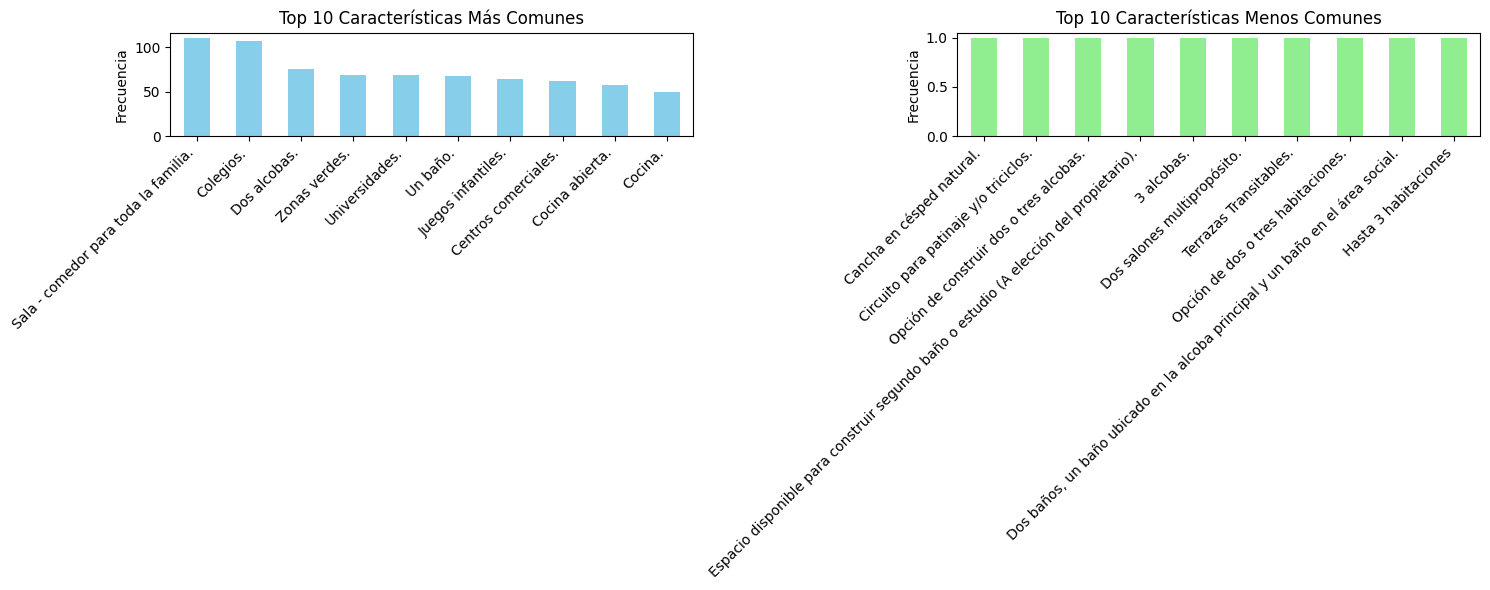

In [36]:

# Asumimos que las columnas de características comienzan inmediatamente después de "Información adicional"
columnas_caracteristicas = df_fragmentado.columns[df_fragmentado.columns.get_loc("Información adicional")+1:]

# Calculamos la suma de cada característica para determinar su frecuencia
caracteristicas_frecuencia = df_fragmentado[columnas_caracteristicas].sum().sort_values(ascending=False)

# Seleccionamos las 10 características más y menos comunes
top_10_caracteristicas = caracteristicas_frecuencia.head(10)
bottom_10_caracteristicas = caracteristicas_frecuencia.tail(10)

# Configuración de la figura para mostrar ambas gráficas de barras
plt.figure(figsize=(15, 6))

# Gráfica para las 10 características más comunes
plt.subplot(1, 2, 1)
top_10_caracteristicas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Características Más Comunes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Gráfica para las 10 características menos comunes
plt.subplot(1, 2, 2)
bottom_10_caracteristicas.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Características Menos Comunes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Objetivo 2

Realizar el mismo proceso del objetivo anterior, pero esta ves contemplando otra constructora

<div align="center">
    <img src="images/06.PNG" width="800" height="600">
</div>

Utiliza la biblioteca requests para realizar una solicitud HTTP GET y BeautifulSoup para analizar el contenido HTML de la respuesta. A continuación, se detalla el propósito y funcionamiento del código:

**Realización de la solicitud HTTP GET:** El código inicia realizando una solicitud GET a la URL proporcionada (https://marval.com.co/proyectos/), con la verificación de SSL desactivada (verify=False). Esto último es útil para evitar errores de certificado SSL, aunque se debe tener en cuenta que desactivar la verificación de SSL puede ser riesgoso desde el punto de vista de la seguridad, ya que expone a ataques de intermediario (man-in-the-middle).

**Verificación del estado de la solicitud:** Se verifica si la solicitud HTTP se completó con éxito, comprobando que el código de estado de la respuesta (status_code) sea 200, lo que indica una respuesta exitosa.

**Análisis del contenido HTML:** Si la solicitud es exitosa, el contenido HTML de la respuesta se analiza con BeautifulSoup, utilizando el parser 'html.parser'.

**Extracción de títulos de proyectos:** El script busca todos los elementos de anclaje (a) que están dentro de elementos h2 con la clase item-title. Estos elementos h2 se encuentran dentro de contenedores div con las clases item-body y flex-grow-1. Este selector CSS específico (div.item-body.flex-grow-1 h2.item-title a) se utiliza para navegar por la estructura del HTML y localizar los títulos de los proyectos inmobiliarios listados en la página.

**Impresión de los títulos:** Para cada elemento encontrado que cumple con los criterios de búsqueda, el código extrae y limpia el texto asociado (usando text.strip()) para eliminar espacios en blanco innecesarios antes de imprimirlo. Esto resulta en la impresión de los títulos de los proyectos inmobiliarios encontrados en la página web.


Sin embargo, esto no nos funciona, ya que hay un boton de "cargar mas" al final de la pagina principal y tambien queremos obtener esa informacion

In [ ]:
# URL de la página web
url = "https://marval.com.co/proyectos/"

# Realizar la solicitud GET con la verificación de SSL desactivada
respuesta = requests.get(url, verify=False)

# Verificar el estado de la solicitud
if respuesta.status_code == 200:
    # Parsear el contenido HTML
    soup = BeautifulSoup(respuesta.text, 'html.parser')
    # Buscar todos los elementos 'a' dentro de 'h2' con clase 'item-title', que están dentro de los contenedores 'div' con clase 'item-body' y 'flex-grow-1'
    titulos = soup.select('div.item-body.flex-grow-1 h2.item-title a')
    # Iterar sobre cada título y imprimir el texto
    for titulo in titulos:
        print(titulo.text.strip())
else:
    print("Error en la solicitud: Estado", respuesta.status_code)

Por lo cual, debemos es realizar una solicitud por API, que se encuentra en la siguiente ruta.

<div align="center">
    <img src="images/07.PNG" width="800" height="600">
</div>

Realizamos una solicitud AJAX POST al sitio web de Marval para cargar información sobre propiedades inmobiliarias, específicamente proyectos. La solicitud utiliza parámetros específicos para filtrar y ordenar los resultados obtenidos. A continuación, se describe el propósito y funcionamiento del código en detalle:

**URL de la Solicitud AJAX:** La URL objetivo (https://marval.com.co/wp-admin/admin-ajax.php) es un punto de acceso común en sitios web basados en WordPress para manejar solicitudes AJAX mediante el archivo admin-ajax.php. Este enfoque permite realizar operaciones dinámicas sin necesidad de recargar la página completa.

**Parámetros de la Solicitud:** El diccionario data contiene los parámetros enviados en la solicitud POST. Estos parámetros incluyen acciones específicas (action) y filtros como el límite de propiedades a cargar (prop_limit), el número de página (paged), tipos y estados de las propiedades, entre otros. Estos parámetros son usados por el servidor para determinar qué datos devolver.

**Realización de la Solicitud POST:** La solicitud POST se realiza utilizando la biblioteca requests, pasando la URL y el diccionario data como parámetros. 

**Verificación del Estado de la Solicitud:** Se verifica si la solicitud fue exitosa (código de estado HTTP 200). Si es así, se procede a procesar la respuesta; de lo contrario, se imprime un mensaje de error.

**Procesamiento de la Respuesta:** La respuesta se analiza con BeautifulSoup usando html.parser como analizador. Esto permite extraer elementos específicos del contenido HTML devuelto. En este ejemplo, se busca por elementos h2 con la clase item-title, los cuales presumiblemente contienen los títulos de los proyectos inmobiliarios.

**Extracción y Presentación de Datos:** Para cada proyecto encontrado, se extrae y limpia el texto del título (utilizando .text.strip() para eliminar espacios en blanco innecesarios) y luego se imprime. Esto proporciona una lista de títulos de proyectos basada en los criterios de filtrado especificados en la solicitud.

In [ ]:
# URL de la solicitud AJAX
url = "https://marval.com.co/wp-admin/admin-ajax.php"

# Parámetros de la solicitud identificados
data = {
    'action': 'houzez_loadmore_properties',
    'prop_limit': 9,  # Límite de propiedades por carga
    'paged': 2,  # Número de página o conjunto de resultados a cargar
    'card_version': 'item-v2',  # Versión de la tarjeta de propiedad
    'type': 'proyectos',  # Tipo de propiedades a cargar
    'status': 'en-construccion,en-entregas,lanzamiento,sobre-planos,ultimas-unidades',  # Estado de las propiedades
    'state': '',  # Estado/Departamento (vacío significa sin filtro por estado)
    'city': '',  # Ciudad (vacío significa sin filtro por ciudad)
    'country': '',  # País (vacío significa sin filtro por país)
    'area': '',  # Área (vacío significa sin filtro por área)
    'label': '',  # Etiqueta (vacío significa sin filtro por etiqueta)
    'user_role': '',  # Rol del usuario (vacío significa sin filtro por rol)
    'featured_prop': '',  # Propiedades destacadas (vacío significa sin filtro por destacados)
    'sort_by': 'd_date',  # Ordenar por fecha descendente
    'offset': '',  # Desplazamiento (vacío significa sin desplazamiento específico)
}

# Realizar la solicitud POST
respuesta = requests.post(url, data=data , verify=False)

if respuesta.status_code == 200:
    # Procesar la respuesta
    soup = BeautifulSoup(respuesta.content, 'html.parser')
    # Aquí iría tu código para extraer y procesar la información deseada del contenido HTML
    
    # Ejemplo: imprimir los títulos de los proyectos cargados
    proyectos = soup.find_all('h2', class_='item-title')
    for proyecto in proyectos:
        titulo = proyecto.find('a').text.strip()
        print(titulo)
else:
    print(f"Error al realizar la solicitud: Estado {respuesta.status_code}")

Se compone de una función principal cargar_proyectos(pagina) y un bucle que itera a través de las páginas de proyectos hasta que ya no se encuentran más. A continuación, se detallan las partes clave del script:

**Función cargar_proyectos(pagina)**

- Parámetros: Recibe un número de página como argumento para cargar proyectos específicos de esa página.
- Comportamiento: Realiza una solicitud POST a una URL específica de AJAX, pasando parámetros que incluyen la acción deseada, el límite de propiedades por carga, el número de página, y filtros específicos como el tipo de proyecto y el estado de construcción.
- Respuesta: Si la solicitud es exitosa (código de estado HTTP 200), devuelve el contenido de la respuesta. En caso contrario, devuelve None.

**Bucle Principal**

- Inicia en la página 1 y hace uso de un bucle while True para iterar a través de las páginas de proyectos.
- Utiliza la función cargar_proyectos para obtener el contenido HTML de la página actual de proyectos.
 Analiza el contenido HTML con BeautifulSoup para extraer información de los proyectos listados en la página.
- Para cada proyecto, intenta extraer detalles adicionales accediendo a la URL específica del proyecto. Esto incluye hacer una nueva solicitud GET para cada proyecto y buscar elementos HTML específicos, como una lista de amenidades.
- Imprime las amenidades encontradas y detalles básicos del proyecto como el nombre, URL, estado/etiqueta, precio, y metros cuadrados. (Nota: La implementación de la extracción de titulo, estado, precio, y metros_cuadrados no se muestra completamente en el fragmento de código proporcionado).
- Si no se encuentran proyectos en la página actual (indicado por proyectos vacío), el bucle se rompe, terminando la ejecución.
- Si la función cargar_proyectos devuelve None, se imprime un mensaje de error indicando problemas al cargar la página, y el bucle se rompe.

In [ ]:
def cargar_proyectos(pagina):
    url = "https://marval.com.co/wp-admin/admin-ajax.php"
    data = {
        'action': 'houzez_loadmore_properties',
        'prop_limit': 9,
        'paged': pagina,
        'card_version': 'item-v2',
        'type': 'proyectos',
        'status': 'en-construccion,en-entregas,lanzamiento,sobre-planos,ultimas-unidades',
        'sort_by': 'd_date',
    }
    respuesta = requests.post(url, data=data, verify=False)
    if respuesta.status_code == 200:
        return respuesta.content
    else:
        return None

# Iniciar en la página 1
pagina = 1

while True:
    respuesta_html = cargar_proyectos(pagina)
    if respuesta_html:
        soup = BeautifulSoup(respuesta_html, 'html.parser')
        proyectos = soup.find_all('div', class_='item-body flex-grow-1')
        if not proyectos:
            print("No se encontraron más proyectos.")
            break

        for proyecto in proyectos:
            # Extraer el título/nombre del proyecto
            contenedor_titulo = proyecto.find('h2', class_='item-title')
            if contenedor_titulo and contenedor_titulo.find('a'):  # Asegúrate de que el contenedor y el enlace existen
                url_proyecto = contenedor_titulo.find('a')['href']
                # Hacer una solicitud HTTP a la URL del proyecto
                respuesta_proyecto = requests.get(url_proyecto, verify=False)
                if respuesta_proyecto.status_code == 200:
                    soup_proyecto = BeautifulSoup(respuesta_proyecto.content, 'html.parser')
                    # Buscar el contenedor de la lista de amenidades
                    lista_amenidades = soup_proyecto.find('ul', class_='list-3-cols list-unstyled')
                    if lista_amenidades:
                        amenidades = lista_amenidades.find_all('li')
                        amenidades_texto = [amenidad.get_text(strip=True) for amenidad in amenidades]
                        print(f"Amenidades: {', '.join(amenidades_texto)}")
                    else:
                        print("No se encontraron amenidades.")
                else:
                    print(f"No se pudo cargar la página del proyecto: {url_proyecto}")
            else:
                url_proyecto = 'No disponible'

            print(f"Nombre: {titulo}")
            print(f"URL: {url_proyecto}")
            print(f"Estado/Etiqueta: {', '.join(estado)}")
            print(f"Precio: {precio}")
            print(f"Metros Cuadrados: {metros_cuadrados}")
            print("----------")

        # Cargar la siguiente página
        pagina += 1
    else:
        print(f"Error al cargar la página {pagina}")
        break

Ahora, ingresa a cada URL recuperada anteriormente e ingresa a cada pagina para obtener informacion adicional

**Bucle Principal**

- Comienza en la página 1 y utiliza un bucle while True para iterar a través de las páginas hasta que ya no se encuentran más proyectos o hasta que ocurre un error al cargar una página.
- Dentro de cada iteración, se analiza el contenido HTML para extraer información relevante de cada proyecto listado.
- Para cada proyecto, se extrae el nombre, la URL, el estado/etiqueta, el precio, los metros cuadrados, y las amenidades. Se hace un esfuerzo adicional para acceder a la página específica de cada proyecto (si es posible) para extraer un listado de amenidades.
- Esta información se va acumulando en data_rows, una lista de diccionarios, donde cada diccionario contiene la información extraída de un proyecto.

In [ ]:
def cargar_proyectos(pagina):
    url = "https://marval.com.co/wp-admin/admin-ajax.php"
    data = {
        'action': 'houzez_loadmore_properties',
        'prop_limit': 9,
        'paged': pagina,
        'card_version': 'item-v2',
        'type': 'proyectos',
        'status': 'en-construccion,en-entregas,lanzamiento,sobre-planos,ultimas-unidades',
        'sort_by': 'd_date',
    }
    respuesta = requests.post(url, data=data, verify=False)
    if respuesta.status_code == 200:
        return respuesta.content
    else:
        return None
data_rows = []

# Inicializar un DataFrame vacío con las columnas deseadas
columnas = ['Nombre', 'URL', 'Estado/Etiqueta', 'Precio', 'Metros Cuadrados', 'Amenidades']
df_proyectos = pd.DataFrame(columns=columnas)

# Iniciar en la página 1
pagina = 1

while True:
    respuesta_html = cargar_proyectos(pagina)
    if respuesta_html:
        soup = BeautifulSoup(respuesta_html, 'html.parser')
        proyectos = soup.find_all('div', class_='item-body flex-grow-1')
        if not proyectos:
            print("No se encontraron más proyectos.")
            break

        for proyecto in proyectos:
            # Extraer información del proyecto
            titulo = proyecto.find('h2', class_='item-title').get_text(strip=True)
            estado_etiquetas = proyecto.find_all('a', class_='label-status') + proyecto.find_all('a', class_='hz-label')
            estado = ', '.join([etiqueta.get_text(strip=True) for etiqueta in estado_etiquetas])
            precio = proyecto.find('li', class_='item-price').get_text(strip=True) if proyecto.find('li', class_='item-price') else 'No disponible'
            metros_cuadrados = proyecto.find('li', class_='h-area').get_text(strip=True) if proyecto.find('li', class_='h-area') else 'No disponible'
            
            contenedor_titulo = proyecto.find('h2', class_='item-title')
            if contenedor_titulo and contenedor_titulo.find('a'):
                url_proyecto = contenedor_titulo.find('a')['href']
            else:
                url_proyecto = 'No disponible'
            
            # Inicializar variable de amenidades
            amenidades_texto = 'No disponible'
            
            # Extraer amenidades si es posible
            if url_proyecto != 'No disponible':
                respuesta_proyecto = requests.get(url_proyecto, verify=False)
                if respuesta_proyecto.status_code == 200:
                    soup_proyecto = BeautifulSoup(respuesta_proyecto.content, 'html.parser')
                    lista_amenidades = soup_proyecto.find('ul', class_='list-3-cols list-unstyled')
                    if lista_amenidades:
                        amenidades = lista_amenidades.find_all('li')
                        amenidades_texto = ', '.join([amenidad.get_text(strip=True) for amenidad in amenidades])
            
            # Añadir la información al DataFrame
            data_rows.append({
                'Nombre': titulo,
                'URL': url_proyecto,
                'Estado/Etiqueta': estado,
                'Precio': precio,
                'Metros Cuadrados': metros_cuadrados,
                'Amenidades': amenidades_texto
            })

        # Cargar la siguiente página
        pagina += 1
    else:
        print(f"Error al cargar la página {pagina}")
        break

# Crear un DataFrame con la lista de diccionarios
df_proyectos = pd.DataFrame(data_rows, columns=columnas)

# Mostrar el DataFrame
df_proyectos.head(5)

In [3]:
# Guardar el DataFrame en un archivo CSV
df_proyectos.to_csv('proyectos_marval.csv', index=False)

In [4]:
# Cambiar el dataframe a df
df = df_proyectos

Con el fin de tener un orden, procedemos a ordenar de manera alfabetica los datos de la columna "Información adicional"

In [ ]:

# Dividir, ordenar y unir cada entrada de 'Amenidades'
df['Amenidades'] = df['Amenidades'].apply(lambda x: ', '.join(sorted(x.split(', '))) if x != 'No disponible' else x)

# Verificar el resultado mostrando las primeras 5 filas
df.head()


Ahora, teniendo la informacion ordenada, vamos a crear una nueva columna por cada tipo de dato y asi identificar si los proyectos tambien poseen esta caracteristica.

Las alertas generadas de "PerformanceWarning" se debe a la cantidad de columnas y lo fragmentado que queda el dataframe, por lo cual, lo mas recomendable es crear uno nuevo

In [ ]:
# Para convertir cada amenidad única en su propia columna y marcar con 1 si el proyecto tiene esa amenidad y 0 si no,
# primero necesitaremos identificar todas las amenidades únicas en todos los proyectos.

# Crear un conjunto de todas las amenidades únicas
amenidades_unicas = set()
for amenidades in df['Amenidades']:
    if amenidades != 'No disponible':
        amenidades_unicas.update(amenidades.split(', '))

# Crear columnas para cada amenidad única
for amenidad in sorted(amenidades_unicas):
    df[amenidad] = df['Amenidades'].apply(lambda x: 1 if amenidad in x else 0)

# Eliminar la columna original 'Amenidades' para simplificar la visualización
df.drop('Amenidades', axis=1, inplace=True)

# Mostrar las primeras 5 filas para verificar el resultado
df.head()
newframe = df.copy()

Guardamos el archivo por si lo queremos analizar

In [9]:
# Guardar el DataFrame en un archivo CSV
newframe.to_csv('proyectos_marval_fragmentado.csv', index=False)

Verificamos las cantidades para ver si vale la pena graficar

In [ ]:
# Para obtener la cantidad de proyectos que tienen cada amenidad, sumaremos los valores en las columnas de amenidades.
# Excluimos las primeras columnas que contienen información general del proyecto y no corresponden a amenidades.

# Columnas de amenidades (excluyendo las columnas de información general del proyecto)
columnas_amenidades = newframe.columns[5:]  # Excluir las primeras 5 columnas

# Sumar los valores en cada columna de amenidades para obtener la cantidad de proyectos que tienen cada amenidad
cantidad_por_amenidad = newframe[columnas_amenidades].sum()

# Ordenar los resultados para mostrar las amenidades más comunes primero
cantidad_por_amenidad_ordenada = cantidad_por_amenidad.sort_values(ascending=False)

cantidad_por_amenidad_ordenada

**Graficas de ejemplo**

C:\Users\USER\AppData\Local\Temp\ipykernel_17868\3327582876.py:24: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


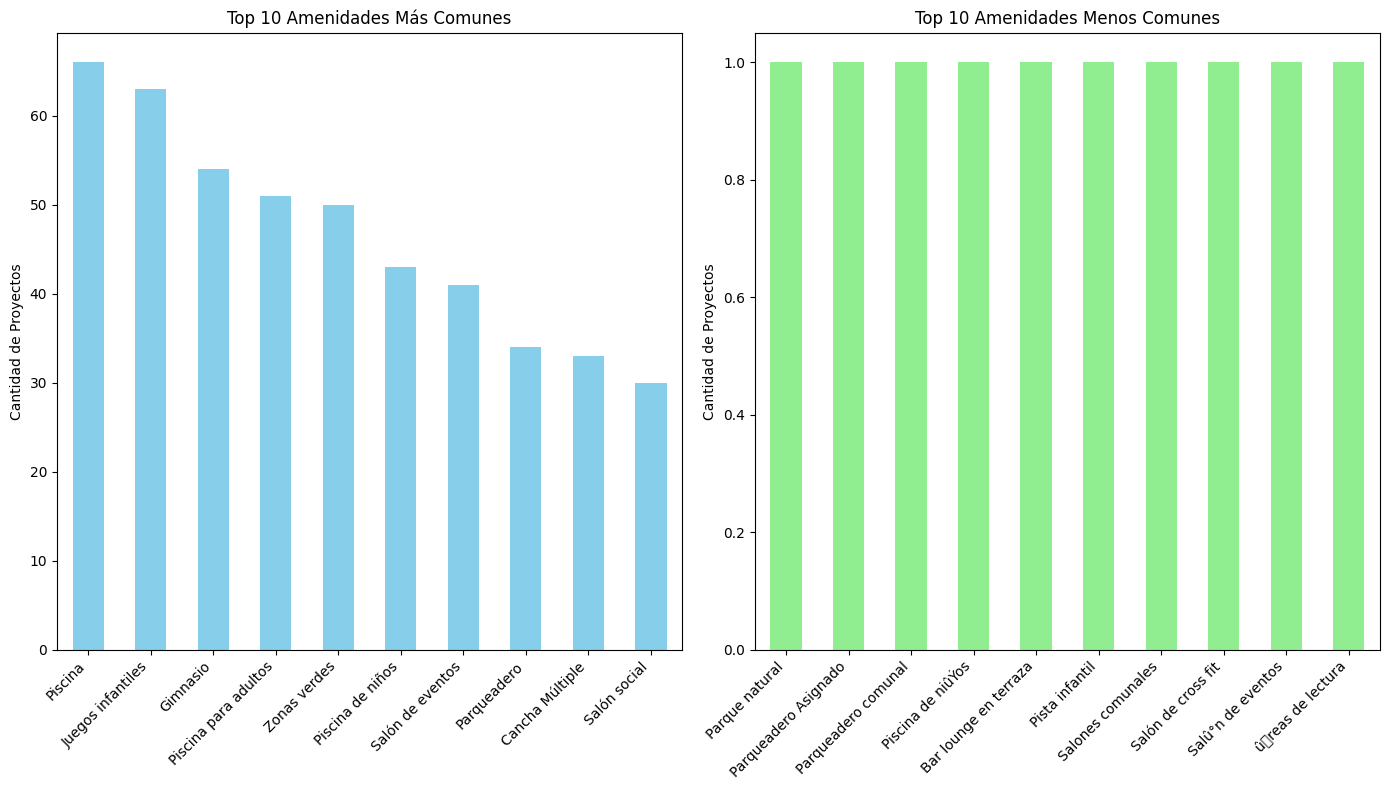

In [12]:
# Seleccionar las 10 amenidades más comunes
top_10_amenidades = cantidad_por_amenidad_ordenada.head(10)

# Seleccionar las 10 amenidades menos comunes
bottom_10_amenidades = cantidad_por_amenidad_ordenada.tail(10)

# Configurar el tamaño de las figuras
plt.figure(figsize=(14, 8))

# Gráfica para las 10 amenidades más comunes
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
top_10_amenidades.plot(kind='bar', color='skyblue')
plt.title('Top 10 Amenidades Más Comunes')
plt.ylabel('Cantidad de Proyectos')
plt.xticks(rotation=45, ha='right')

# Gráfica para las 10 amenidades menos comunes
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
bottom_10_amenidades.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Amenidades Menos Comunes')
plt.ylabel('Cantidad de Proyectos')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
